# YIELD TO MATURITY

# Simple Loan

In [22]:
class Simple_Loan:
    def get_pv(self, flow, int_rate, maturity):
        pv = flow / (1 + int_rate)**maturity
        
        return pv
    
    def get_ytm(self, flow, pv, maturity):
        ytm = (flow / pv)**(1/maturity) - 1
        
        return ytm

In [2]:
simple_loan_calculator = Simple_Loan()

In [3]:
simple_loan_calculator.get_ytm(110, 105.77, 2)

0.019800194360956258

In [4]:
simple_loan_calculator.get_pv(110, 0.02, 2)

105.7285659361784

# Discount Bond

In [5]:
class Discount_Bond:
    def get_pv(self, face_value, int_rate, years):
        pv = face_value /  (1 + int_rate)**years
        return pv
    
    @staticmethod
    def get_ytm(bond_price, face_price, years):
        ytm = (face_price / bond_price)**(1/years) - 1
        
        return ytm

In [6]:
discount_calculator = Discount_Bond()

In [7]:
discount_calculator.get_pv(100, 0.5, 5)

13.168724279835391

In [8]:
discount_calculator.get_ytm(13, 100, 5)

0.5038735793407285

# Fixed Loan

In [9]:
class Fixed_Loan:
    @staticmethod
    def get_pv(fixed_price, int_rate, years):
        pv = sum([fixed_price / (1 + int_rate)**y for y in range(years)])
        
        return pv
    
    def get_ytm(self, bond_price, fixed_price, years, estimate=0.55):
        import scipy
        from scipy import optimize
        
        get_yield = lambda int_rate: self.get_pv(fixed_price, int_rate, years) - bond_price
        
        return optimize.newton(get_yield, estimate)

In [10]:
fixed_loan_calculator = Fixed_Loan()

In [11]:
fixed_loan_calculator.get_pv(100, 10, 3)

109.91735537190083

In [12]:
fixed_loan_calculator.get_ytm(100, 50, 3)

0.618033988749895

# Coupon Bond

In [23]:
class Coupon_Bond:
    def get_price(self, coupon, face_value, int_rate, years, freq=1):
        total_coupons_pv = self.get_coupons_pv(coupon, int_rate, years, freq)
        face_value_pv    = self.get_face_value_pv(face_value, int_rate, years)
        result           = total_coupons_pv + face_value_pv
        return result
    
    @staticmethod
    def get_face_value_pv(face_value, int_rate, years):
        fvpv = face_value / (1 + int_rate)**years
        return fvpv
    
    def get_coupons_pv(self, coupon, int_rate, years, freq=1):
        pv = 0
        for period in range(years*freq):
            pv += self.get_coupon_pv(coupon, int_rate, period+1, freq)
        return pv
    
    @staticmethod
    def get_coupon_pv(coupon, int_rate, period, freq):
        pv = coupon /(1 + int_rate/freq)**period
        return pv
    
    def get_ytm(self, bond_price, face_value, coupon, years, freq=1, estimate=0.05):
        import scipy
        from scipy import optimize
        get_yield = lambda int_rate: self.get_price(coupon, face_value, int_rate, years, freq) - bond_price
        return optimize.newton(get_yield, estimate)

In [24]:
coupon_bond_calculator = Coupon_Bond()

In [25]:
coupon_bond_calculator.get_ytm(bond_price=95.05, face_value=100, coupon=5.75, years=2, freq=1)

0.0854662799059332

In [26]:
coupon_bond_calculator.get_price(coupon=5.75, face_value=100, int_rate=0.078, years=2, freq=1)

96.33425810870814

In [27]:
coupon_bond_calculator.get_price(coupon=5.75, face_value=100, int_rate=0.078, years=2, freq=2)

106.97347985047101

# Visualization

In [17]:
import numpy as np
import seaborn as sns
from scipy import stats

interest_rates = np.arange(0, 1, 0.01).tolist()

## Interest rate vs Bond Price

In [30]:
import numpy as np
import numpy as np
import seaborn as sns
from scipy import stats

interest_rates = np.arange(0, 1, 0.01).tolist()
bond_prices    = []
for int_rate in interest_rates:
    bond_price = coupon_bond_calculator.get_price(
        coupon=5.75, 
        face_value=100, 
        int_rate=int_rate, 
        years=2, 
        freq=1
    )
    bond_prices.append(bond_price)

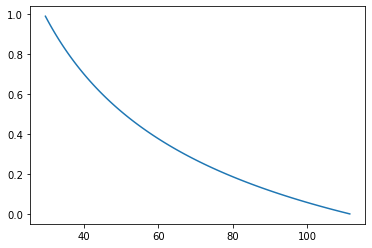

In [31]:
sns.lineplot(x=bond_prices, y=interest_rates)